### 다중 선형 회귀

In [2]:
import tensorflow as tf

In [11]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]

# x1,x2 의 데이터 값
x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]   #새로 추가되는 값
y_data = [y_row[2] for y_row in data]

# random_uniform을 사용하는 이유?
# 범위를 지정해 연산 시간을 줄여주기 위해서.
a1= tf.Variable(tf.random_uniform([1],0,10, dtype = tf.float64,seed = 0)) 
a2 = tf.Variable(tf.random_uniform([1],0,10, dtype = tf.float64,seed = 0)) 
b = tf.Variable(tf.random_uniform([1],0,100, dtype = tf.float64,seed = 0))


y = a1*x1 + a2*x2 + b

- x_row1는 data를 받아 들이고, 그 중 0번째 인덱스로 x1이 만들어짐
- 첫번째 for 문에서 x_row1은 [2,0,81]이고 그중 0번째 index 2가 x1의 첫 번째 요소가 됨

In [12]:
#텐서플로 RMSE 함수
# 평균제곱근오차
# rmse도 tensor로 계산됨
rmse = tf.sqrt(tf.reduce_mean(tf.square( y- y_data)))

# 학습률 값
learning_rate = 0.1

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
# train = optimizer.minimize(rmse)


#텐서플로를 이용한 학습
#세션 실행
with tf.Session() as sess:  
    
    #변수 초기화
    sess.run(tf.global_variables_initializer())
    
    # 2001번 실행 (0번째를 포함하므로)
    for step in range(2001):
        # rmse를 최소화하는 값을 내리는 결과를 2001번 반복
        # 그래프 run
        # sess.run('그래프명')
        sess.run(gradient_decent)
        
        #100번마다 결과 출력
        if step %100 == 0:
            # Epoch 몇 번 반복했는지? (= step)
            # RMSE 평균제곱근 오차값
            print('Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f,기울기 a2 =%.4f y절편 b = %.4f'%
                 (step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))

Epoch: 0, RMSE = 49.1842, 기울기 a1 = 7.5270,기울기 a2 =7.8160 y절편 b = 80.5980
Epoch: 100, RMSE = 1.8368, 기울기 a1 = 1.1306,기울기 a2 =2.1316 y절편 b = 78.5119
Epoch: 200, RMSE = 1.8370, 기울기 a1 = 1.1879,기울기 a2 =2.1487 y절편 b = 78.1057
Epoch: 300, RMSE = 1.8370, 기울기 a1 = 1.2122,기울기 a2 =2.1571 y절편 b = 77.9352
Epoch: 400, RMSE = 1.8370, 기울기 a1 = 1.2226,기울기 a2 =2.1607 y절편 b = 77.8636
Epoch: 500, RMSE = 1.8370, 기울기 a1 = 1.2269,기울기 a2 =2.1622 y절편 b = 77.8335
Epoch: 600, RMSE = 1.8370, 기울기 a1 = 1.2288,기울기 a2 =2.1628 y절편 b = 77.8208
Epoch: 700, RMSE = 1.8370, 기울기 a1 = 1.2295,기울기 a2 =2.1631 y절편 b = 77.8155
Epoch: 800, RMSE = 1.8370, 기울기 a1 = 1.2299,기울기 a2 =2.1632 y절편 b = 77.8133
Epoch: 900, RMSE = 1.8370, 기울기 a1 = 1.2300,기울기 a2 =2.1632 y절편 b = 77.8124
Epoch: 1000, RMSE = 1.8370, 기울기 a1 = 1.2301,기울기 a2 =2.1633 y절편 b = 77.8120
Epoch: 1100, RMSE = 1.8370, 기울기 a1 = 1.2301,기울기 a2 =2.1633 y절편 b = 77.8118
Epoch: 1200, RMSE = 1.8370, 기울기 a1 = 1.2301,기울기 a2 =2.1633 y절편 b = 77.8117
Epoch: 1300, RMSE = 1.8370, 기울기 a1 =

기울기 a1,a2넣고 실제값과 예측값 비교

In [58]:
Epoch0 = []
Epoch2000 = []


for i in range(len(x1)):    
    Epoch0.append(7.527*x1[i]+7.816*x2[i]-80.5980)
    Epoch2000.append(1.230*x1[i] + 2.1633*x2[i] - 77.8117)
    

In [53]:
for i in  range(len(y_data)):
    print(y_data[i]-Epoch0[i])

146.54399999999998
112.226
110.804
93.934


In [51]:
for i in  range(len(y_data)):
    print(y_data[i]-Epoch2000[i])

156.3517
157.2385
157.1051
158.4818


### 다중 선형 회귀 실습

csv파일 읽어서, 다중선형회귀

x = 나이, 몸무게

In [123]:
import numpy as np



data_blood_fat = np.loadtxt('C:/Users/user/Blood_fat.csv',delimiter = ',')


# x1 = data_blood_fat[:,0]
# x2 = data_blood_fat[:,1]
# y_data = data_blood_fat[:,2]

x1 = [x_row1[0] for x_row1 in data_blood_fat]
x2 = [x_row2[1] for x_row2 in data_blood_fat]  
y_data = [y_row[2] for y_row in data_blood_fat]



a1 = tf.Variable(tf.random_uniform([1],0,10, dtype = tf.float64, seed = 0))
a2 = tf.Variable(tf.random_uniform([1],0,10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1],0,100, dtype = tf.float64, seed = 0))

y = a1*x2 + a2*x2 + b



rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

learning_rate = 0.01

gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    
    
    for step in range(2001):
        sess.run(gradient_descent)   # 오차를 최소화하는 알고리즘, # 이 알고리즘을 구동할 수 있는 그래프를 RUN
        
        
        
        if step % 100 == 0:
            
            #각각의 tensor가 값이 되려면 구동해야함.
            print('Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f,기울기 a2 =%.4f y절편 b = %.4f'%(step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))      
            
            # for i in range(len(y_data)):
                # print('예측값: %.f, 실제값 = %.f'%(sess.run(y)[i],y_data[i]))
                
            z = sess.run(y)
            print('R1 = %d     R2 = %d    R3 = %d    R4 = %d'%(z[0],z[1],z[2],z[3]))    

Epoch: 0, RMSE = 390.6699, 기울기 a1 = 7.6619,기울기 a2 =7.6619 y절편 b = 80.6807
R1 = 785     R2 = 387    R3 = 877    R4 = 540
Epoch: 100, RMSE = 42.1814, 기울기 a1 = 2.9169,기울기 a2 =2.9169 y절편 b = 80.6108
R1 = 348     R2 = 197    R3 = 383    R4 = 255
Epoch: 200, RMSE = 42.1794, 기울기 a1 = 2.9164,기울기 a2 =2.9164 y절편 b = 80.6555
R1 = 348     R2 = 197    R3 = 383    R4 = 255
Epoch: 300, RMSE = 42.1774, 기울기 a1 = 2.9159,기울기 a2 =2.9159 y절편 b = 80.7001
R1 = 348     R2 = 197    R3 = 383    R4 = 255
Epoch: 400, RMSE = 42.1754, 기울기 a1 = 2.9154,기울기 a2 =2.9154 y절편 b = 80.7447
R1 = 348     R2 = 197    R3 = 383    R4 = 255
Epoch: 500, RMSE = 42.1735, 기울기 a1 = 2.9148,기울기 a2 =2.9148 y절편 b = 80.7892
R1 = 348     R2 = 197    R3 = 383    R4 = 255
Epoch: 600, RMSE = 42.1715, 기울기 a1 = 2.9143,기울기 a2 =2.9143 y절편 b = 80.8335
R1 = 348     R2 = 197    R3 = 383    R4 = 255
Epoch: 700, RMSE = 42.1695, 기울기 a1 = 2.9138,기울기 a2 =2.9138 y절편 b = 80.8778
R1 = 348     R2 = 197    R3 = 383    R4 = 255
Epoch: 800, RMSE = 42.1676, 기울기 a

- tf.reduce_mean 사용된 data들 각각에서 계산된 합의 평균을 구하는 함수
- tf.square 제곱함수
- tf.sqrt 제곱근합수
- tf.train.GradientDescentOptimizer rmse를 최소화할 수 있는 경사하강법

In [126]:
! pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

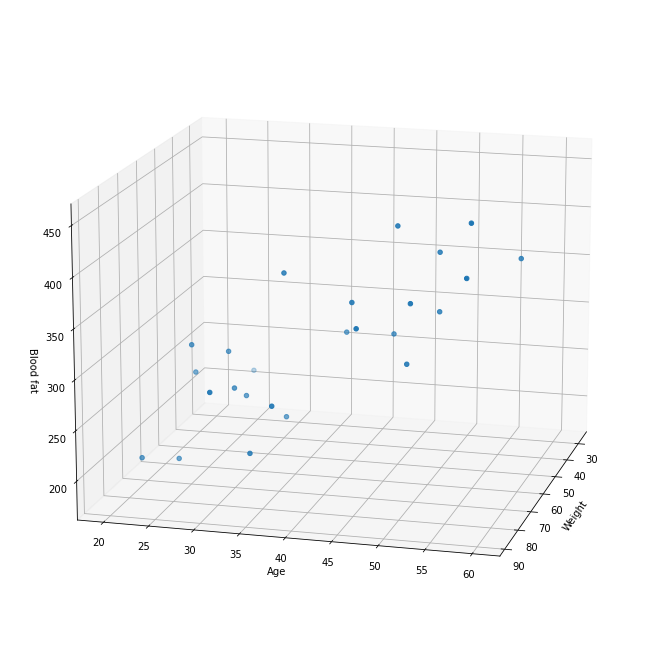

In [129]:
# figure 생성
fig = plt.figure(figsize=(12,12))

# 전체 공간을 1*1로 잡은 중 첫번째, 3d로 표시, 전체공간을 나누는 개념
ax = fig.add_subplot(111, projection = '3d')

# 산점도 plot
ax.scatter(x1,x2,y_data)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')

#표고와 방위각 지정
ax.view_init(15,15)


plt.show()
# graph view end


### 로지스틱 회귀

In [138]:
import tensorflow as tf
import numpy as np

In [157]:
# x,y의 값
data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_data[1] for y_data in data]

# a, b  변수  선언
# 범위 지정 XXXXX
a = tf.Variable(tf.random_normal([1],dtype = tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1],dtype = tf.float64, seed=0))

# y 시그모이드 함수의 방정식을 세운다.
y = 1/(1+ np.e**(a * x_data + b))

#  loss를  구하는  함수   #loss = 오차값
# loss = - ( y * logh + ( 1-y ) log ( 1-h ) )
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1- np.array(y_data)) * tf.log(1-y))

#학습률 값
# 0.1~ 0.01 
learning_rate = 0.5

# loss를  최소로  하는  값  찾기
#  경사하강법의  결과를  gradient_decent에  할당시킨다.
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#  학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(60001):
        sess.run(gradient_descent)
        if i % 6000 == 0:
            print('Epoch = %.f, loss = %.4f, 기울기 a = %.4f, y절편 = %.4f'%
                  (i, sess.run(loss),sess.run(a),sess.run(b)))
            
            new_x_data = 5
            y_test = 1/(1+ np.e**((-a * new_x_data) + b))
            print(sess.run(y_test))
            
            new_x_data = 7
            y_test = 1/(1+ np.e**((-a * new_x_data) + b))
            print(sess.run(y_test))
            
            new_x_data = 13
            y_test = 1/(1+ np.e**((-a * new_x_data) + b))
            print(sess.run(y_test))


Epoch = 0, loss = 1.2676, 기울기 a = 0.1849, y절편 = -0.4334
[0.795413]
Epoch = 6000, loss = 0.0152, 기울기 a = -2.9211, y절편 = 20.2983
[6.94159795e-16]
Epoch = 12000, loss = 0.0081, 기울기 a = -3.5638, y절편 = 24.8011
[3.09344961e-19]
Epoch = 18000, loss = 0.0055, 기울기 a = -3.9557, y절편 = 27.5464
[2.79902016e-21]
Epoch = 24000, loss = 0.0041, 기울기 a = -4.2380, y절편 = 29.5232
[9.45122448e-23]
Epoch = 30000, loss = 0.0033, 기울기 a = -4.4586, y절편 = 31.0676
[6.69576542e-24]
Epoch = 36000, loss = 0.0028, 기울기 a = -4.6396, y절편 = 32.3346
[7.63061209e-25]
Epoch = 42000, loss = 0.0024, 기울기 a = -4.7930, y절편 = 33.4087
[1.21060728e-25]
Epoch = 48000, loss = 0.0021, 기울기 a = -4.9261, y절편 = 34.3406
[2.45022464e-26]
Epoch = 54000, loss = 0.0019, 기울기 a = -5.0436, y절편 = 35.1636
[5.97722425e-27]
Epoch = 60000, loss = 0.0017, 기울기 a = -5.1489, y절편 = 35.9005
[1.69020984e-27]


data가 5,7,13일때 y_data?

In [148]:
def plus(*args):
    for arg in args:
        y = 1/(1+ np.e**(a * arg + b))
    return y

In [152]:
plus(5,7,13)

<tf.Tensor 'truediv_18:0' shape=(1,) dtype=float64>

## -------------------------------------------------------------------------------------------------------

### 텐서플로우에서의 행렬표현

In [164]:
x = tf.constant([[1.0,2.0,3.0]])
w = tf.constant([[2.0],[2.0],[2.0]])
y = tf.matmul(x,w)

print (x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)

print (result)  # 상수가 아닌 행렬의 형태로 [[12.]] 

(1, 3)
[[12.]]


In [166]:
x = tf.Variable([[1.,2.,3.]])
w = tf.constant([[2.],[2.],[2.]])
y = tf.matmul(x,w)

print (x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)

print (result)

(1, 3)
[[12.]]


### placeholder

In [170]:
input_data = [[1.,2.,3.],[1.,2.,3.],[2.,3.,4]]

x = tf.placeholder(dtype=tf.float32, shape = [None,3])
w = tf.Variable([[2.],[2.],[2.]])
y = tf.matmul(x,w)

sess= tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

result = sess.run(y,feed_dict={x:input_data})

print(result)

[[12.]
 [12.]
 [18.]]


### 브로드캐스팅
- 행렬연산에서 차원이 틀려도 행렬을 자동으로 맞춰줘서 차원을 맞춰주는 개녕
- 행이나 열을 줄이는 것은 불가능



In [175]:
input_data = [[1,1,1],[2,2,2]]


x = tf.placeholder(dtype=tf.float32,shape=[2,3])
w = tf.Variable([[2],[2],[2]],dtype = tf.float32)
b = tf.Variable([4],dtype = tf.float32)
y = tf.matmul(x,w) + b
print(x.get_shape())


sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


# 마지막에 placeholder -> feed_dict
result = sess.run(y,feed_dict = {x:input_data})

print(result)

(2, 3)
[[10.]
 [16.]]


### 여러 입력값을 갖는 로지스틱 회귀

In [188]:
# x,y의 데이터 값

x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)



X2 = tf.placeholder(tf.float64, shape = [None, 2])


a1 = tf.Variable(tf.random_uniform([2,1],dtype = tf.float64))
a2 = tf.Variable(tf.random_uniform([2,1],dtype = tf.float64))


b = tf.Variable([4],dtype = tf.float64)


y = tf.sigmoid(tf.matmul([a1,a2], [x1,x2]) + b)


sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


result = sess.run(y,feed_dict = {X1:x_data,
                                X2:x_data})


print(result)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_16' with dtype double and shape [?,2]
	 [[node Placeholder_16 (defined at C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'Placeholder_16':
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\IPython\core\interactiveshell.py", line 2922, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-186-c28d4d98b76c>", line 6, in <module>
    x2 = tf.placeholder(tf.float64, shape = [None,2])
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6668, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tf_V1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


#### 풀이

In [192]:
#실행할 때 마다 같은 결과를 출력하기 위한 seed값 설정

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)



x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)



#입력값을 플레이스 홀더에 저장
X = tf.placeholder(tf.float64, shape = [None, 2])   # 2개의 값을 가지는 데이터로 설정
Y = tf.placeholder(tf.float64, shape = [None, 1])   # 1개의 값을 가지는 데이터로 설정



# 기울기 a와 바이어스 b의 값을 임의로 정함
a = tf.Variable(tf.random_uniform([2,1],dtype = tf.float64))
#[2,1]의 의미 : 들어오는 값은 2개, 나가는 값은 1개


# 절편은 하나
b = tf.Variable(tf.random_uniform([1],dtype = tf.float64))



# y시그모이드 함수의 방정식을 세움
# ?????????
y = tf.sigmoid(tf.matmul(X, a) + b)



#  loss를  구하는  함수   #loss = 오차값
# loss = - ( y * logh + ( 1-y ) log ( 1-h ) )
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1- np.array(y_data)) * tf.log(1-y))



#학습률 값
# 0.1~ 0.01 
learning_rate = 0.1




# loss를  최소로  하는  값  찾기
#  경사하강법의  결과를  gradient_decent에  할당시킨다.
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


# 정밀도를 측정하기 위해서 만들어 놓음
# tf.cast True와 False가 넘어오면 0,1로 반환하는 코드
# tf.reduce_mean 배열의 평균

predicted = tf.cast(y> 0.5,dtype = tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y), dtype = tf.float64))


#학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    
    
    for i in range(3001):
        a_, b_, loss_, _ = sess.run([a,b,loss,gradient_descent], feed_dict = {X:x_data, Y:y_data})
        if (i % 1) % 200 == 0:
            print('step=%d, a1=%.f, a2 = %.4f, b=%.4f,loss=%.4f'%(i+1,a_[0],a_[1],b_,loss_))

            
            
    print('predicted=',sess.run(predicted, feed_dict={X:x_data}))

    
    
    
    #다른값 테스트
    
    p_val, h_val = sess.run([predicted,y], feed_dict={X:[[1,5],[10,5],[4,5]]})
    print('check predicted =',p_val)  # 연산된 값을 bool로 변환
    print('check hypothesis =',h_val) # 계산값
    
    
    
    
    # 정확도 측정
    
    h, c, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print('\nHypothesis: ',h, '\nCorrect (Y): ',c, '\nAccuracy: ',a)

step=1, a1=0, a2 = 0.4745, b=0.0375,loss=1.4898
step=2, a1=0, a2 = 0.3478, b=-0.0007,loss=1.0232
step=3, a1=-0, a2 = 0.2646, b=-0.0298,loss=0.6671
step=4, a1=-0, a2 = 0.2877, b=-0.0414,loss=0.5976
step=5, a1=-0, a2 = 0.2478, b=-0.0628,loss=0.5933
step=6, a1=-0, a2 = 0.2621, b=-0.0756,loss=0.5846
step=7, a1=-0, a2 = 0.2305, b=-0.0955,loss=0.5799
step=8, a1=-0, a2 = 0.2387, b=-0.1091,loss=0.5736
step=9, a1=-0, a2 = 0.2131, b=-0.1278,loss=0.5690
step=10, a1=0, a2 = 0.2168, b=-0.1419,loss=0.5639
step=11, a1=0, a2 = 0.1958, b=-0.1597,loss=0.5594
step=12, a1=0, a2 = 0.1960, b=-0.1741,loss=0.5548
step=13, a1=0, a2 = 0.1786, b=-0.1912,loss=0.5506
step=14, a1=0, a2 = 0.1763, b=-0.2058,loss=0.5464
step=15, a1=0, a2 = 0.1616, b=-0.2223,loss=0.5424
step=16, a1=0, a2 = 0.1574, b=-0.2370,loss=0.5384
step=17, a1=0, a2 = 0.1448, b=-0.2530,loss=0.5346
step=18, a1=0, a2 = 0.1393, b=-0.2678,loss=0.5308
step=19, a1=0, a2 = 0.1283, b=-0.2833,loss=0.5272
step=20, a1=0, a2 = 0.1219, b=-0.2981,loss=0.5236
ste

step=384, a1=1, a2 = -0.3409, b=-3.1512,loss=0.2258
step=385, a1=1, a2 = -0.3402, b=-3.1563,loss=0.2256
step=386, a1=1, a2 = -0.3394, b=-3.1613,loss=0.2253
step=387, a1=1, a2 = -0.3387, b=-3.1663,loss=0.2250
step=388, a1=1, a2 = -0.3380, b=-3.1714,loss=0.2248
step=389, a1=1, a2 = -0.3373, b=-3.1764,loss=0.2245
step=390, a1=1, a2 = -0.3366, b=-3.1814,loss=0.2243
step=391, a1=1, a2 = -0.3359, b=-3.1864,loss=0.2240
step=392, a1=1, a2 = -0.3351, b=-3.1914,loss=0.2238
step=393, a1=1, a2 = -0.3344, b=-3.1963,loss=0.2235
step=394, a1=1, a2 = -0.3337, b=-3.2013,loss=0.2232
step=395, a1=1, a2 = -0.3329, b=-3.2063,loss=0.2230
step=396, a1=1, a2 = -0.3322, b=-3.2113,loss=0.2227
step=397, a1=1, a2 = -0.3315, b=-3.2162,loss=0.2225
step=398, a1=1, a2 = -0.3307, b=-3.2212,loss=0.2222
step=399, a1=1, a2 = -0.3300, b=-3.2261,loss=0.2220
step=400, a1=1, a2 = -0.3293, b=-3.2310,loss=0.2217
step=401, a1=1, a2 = -0.3285, b=-3.2360,loss=0.2215
step=402, a1=1, a2 = -0.3278, b=-3.2409,loss=0.2212
step=403, a1

step=775, a1=1, a2 = 0.0234, b=-4.7341,loss=0.1572
step=776, a1=1, a2 = 0.0244, b=-4.7374,loss=0.1570
step=777, a1=1, a2 = 0.0254, b=-4.7407,loss=0.1569
step=778, a1=1, a2 = 0.0264, b=-4.7440,loss=0.1568
step=779, a1=1, a2 = 0.0274, b=-4.7473,loss=0.1567
step=780, a1=1, a2 = 0.0284, b=-4.7506,loss=0.1566
step=781, a1=1, a2 = 0.0294, b=-4.7540,loss=0.1564
step=782, a1=1, a2 = 0.0304, b=-4.7573,loss=0.1563
step=783, a1=1, a2 = 0.0314, b=-4.7606,loss=0.1562
step=784, a1=1, a2 = 0.0324, b=-4.7639,loss=0.1561
step=785, a1=1, a2 = 0.0334, b=-4.7672,loss=0.1560
step=786, a1=1, a2 = 0.0344, b=-4.7704,loss=0.1558
step=787, a1=1, a2 = 0.0354, b=-4.7737,loss=0.1557
step=788, a1=1, a2 = 0.0364, b=-4.7770,loss=0.1556
step=789, a1=1, a2 = 0.0374, b=-4.7803,loss=0.1555
step=790, a1=1, a2 = 0.0384, b=-4.7836,loss=0.1554
step=791, a1=1, a2 = 0.0394, b=-4.7869,loss=0.1552
step=792, a1=1, a2 = 0.0404, b=-4.7901,loss=0.1551
step=793, a1=1, a2 = 0.0415, b=-4.7934,loss=0.1550
step=794, a1=1, a2 = 0.0425, b=

step=1151, a1=1, a2 = 0.3882, b=-5.8212,loss=0.1216
step=1152, a1=1, a2 = 0.3892, b=-5.8237,loss=0.1216
step=1153, a1=1, a2 = 0.3901, b=-5.8262,loss=0.1215
step=1154, a1=1, a2 = 0.3910, b=-5.8288,loss=0.1214
step=1155, a1=1, a2 = 0.3919, b=-5.8313,loss=0.1213
step=1156, a1=1, a2 = 0.3928, b=-5.8338,loss=0.1213
step=1157, a1=1, a2 = 0.3937, b=-5.8364,loss=0.1212
step=1158, a1=1, a2 = 0.3947, b=-5.8389,loss=0.1211
step=1159, a1=1, a2 = 0.3956, b=-5.8414,loss=0.1210
step=1160, a1=1, a2 = 0.3965, b=-5.8439,loss=0.1210
step=1161, a1=1, a2 = 0.3974, b=-5.8464,loss=0.1209
step=1162, a1=1, a2 = 0.3983, b=-5.8490,loss=0.1208
step=1163, a1=1, a2 = 0.3992, b=-5.8515,loss=0.1208
step=1164, a1=1, a2 = 0.4002, b=-5.8540,loss=0.1207
step=1165, a1=1, a2 = 0.4011, b=-5.8565,loss=0.1206
step=1166, a1=1, a2 = 0.4020, b=-5.8590,loss=0.1205
step=1167, a1=1, a2 = 0.4029, b=-5.8615,loss=0.1205
step=1168, a1=1, a2 = 0.4038, b=-5.8640,loss=0.1204
step=1169, a1=1, a2 = 0.4047, b=-5.8666,loss=0.1203
step=1170, a

step=1547, a1=0, a2 = 0.7271, b=-6.7188,loss=0.0979
step=1548, a1=0, a2 = 0.7278, b=-6.7208,loss=0.0979
step=1549, a1=0, a2 = 0.7286, b=-6.7229,loss=0.0978
step=1550, a1=0, a2 = 0.7294, b=-6.7249,loss=0.0978
step=1551, a1=0, a2 = 0.7302, b=-6.7269,loss=0.0977
step=1552, a1=0, a2 = 0.7310, b=-6.7290,loss=0.0977
step=1553, a1=0, a2 = 0.7318, b=-6.7310,loss=0.0976
step=1554, a1=0, a2 = 0.7326, b=-6.7330,loss=0.0976
step=1555, a1=0, a2 = 0.7334, b=-6.7350,loss=0.0975
step=1556, a1=0, a2 = 0.7342, b=-6.7371,loss=0.0975
step=1557, a1=0, a2 = 0.7350, b=-6.7391,loss=0.0974
step=1558, a1=0, a2 = 0.7357, b=-6.7411,loss=0.0974
step=1559, a1=0, a2 = 0.7365, b=-6.7431,loss=0.0973
step=1560, a1=0, a2 = 0.7373, b=-6.7452,loss=0.0973
step=1561, a1=0, a2 = 0.7381, b=-6.7472,loss=0.0972
step=1562, a1=0, a2 = 0.7389, b=-6.7492,loss=0.0972
step=1563, a1=0, a2 = 0.7397, b=-6.7512,loss=0.0972
step=1564, a1=0, a2 = 0.7405, b=-6.7533,loss=0.0971
step=1565, a1=0, a2 = 0.7413, b=-6.7553,loss=0.0971
step=1566, a

step=1935, a1=0, a2 = 1.0118, b=-7.4414,loss=0.0821
step=1936, a1=0, a2 = 1.0125, b=-7.4431,loss=0.0820
step=1937, a1=0, a2 = 1.0132, b=-7.4448,loss=0.0820
step=1938, a1=0, a2 = 1.0138, b=-7.4465,loss=0.0820
step=1939, a1=0, a2 = 1.0145, b=-7.4482,loss=0.0819
step=1940, a1=0, a2 = 1.0152, b=-7.4499,loss=0.0819
step=1941, a1=0, a2 = 1.0159, b=-7.4516,loss=0.0818
step=1942, a1=0, a2 = 1.0166, b=-7.4533,loss=0.0818
step=1943, a1=0, a2 = 1.0172, b=-7.4550,loss=0.0818
step=1944, a1=0, a2 = 1.0179, b=-7.4567,loss=0.0817
step=1945, a1=0, a2 = 1.0186, b=-7.4584,loss=0.0817
step=1946, a1=0, a2 = 1.0193, b=-7.4601,loss=0.0817
step=1947, a1=0, a2 = 1.0199, b=-7.4618,loss=0.0816
step=1948, a1=0, a2 = 1.0206, b=-7.4635,loss=0.0816
step=1949, a1=0, a2 = 1.0213, b=-7.4652,loss=0.0816
step=1950, a1=0, a2 = 1.0220, b=-7.4669,loss=0.0815
step=1951, a1=0, a2 = 1.0226, b=-7.4686,loss=0.0815
step=1952, a1=0, a2 = 1.0233, b=-7.4703,loss=0.0815
step=1953, a1=0, a2 = 1.0240, b=-7.4720,loss=0.0814
step=1954, a

step=2313, a1=0, a2 = 1.2509, b=-8.0414,loss=0.0708
step=2314, a1=0, a2 = 1.2515, b=-8.0429,loss=0.0708
step=2315, a1=0, a2 = 1.2521, b=-8.0444,loss=0.0707
step=2316, a1=0, a2 = 1.2526, b=-8.0459,loss=0.0707
step=2317, a1=0, a2 = 1.2532, b=-8.0473,loss=0.0707
step=2318, a1=0, a2 = 1.2538, b=-8.0488,loss=0.0707
step=2319, a1=0, a2 = 1.2544, b=-8.0503,loss=0.0706
step=2320, a1=0, a2 = 1.2550, b=-8.0518,loss=0.0706
step=2321, a1=0, a2 = 1.2556, b=-8.0532,loss=0.0706
step=2322, a1=0, a2 = 1.2562, b=-8.0547,loss=0.0706
step=2323, a1=0, a2 = 1.2568, b=-8.0562,loss=0.0705
step=2324, a1=0, a2 = 1.2573, b=-8.0577,loss=0.0705
step=2325, a1=0, a2 = 1.2579, b=-8.0591,loss=0.0705
step=2326, a1=0, a2 = 1.2585, b=-8.0606,loss=0.0705
step=2327, a1=0, a2 = 1.2591, b=-8.0621,loss=0.0704
step=2328, a1=0, a2 = 1.2597, b=-8.0636,loss=0.0704
step=2329, a1=0, a2 = 1.2603, b=-8.0650,loss=0.0704
step=2330, a1=0, a2 = 1.2609, b=-8.0665,loss=0.0704
step=2331, a1=0, a2 = 1.2614, b=-8.0680,loss=0.0703
step=2332, a

step=2702, a1=0, a2 = 1.4647, b=-8.5798,loss=0.0620
step=2703, a1=0, a2 = 1.4652, b=-8.5811,loss=0.0620
step=2704, a1=0, a2 = 1.4657, b=-8.5824,loss=0.0620
step=2705, a1=0, a2 = 1.4662, b=-8.5837,loss=0.0619
step=2706, a1=0, a2 = 1.4667, b=-8.5850,loss=0.0619
step=2707, a1=0, a2 = 1.4672, b=-8.5863,loss=0.0619
step=2708, a1=0, a2 = 1.4677, b=-8.5876,loss=0.0619
step=2709, a1=0, a2 = 1.4683, b=-8.5889,loss=0.0619
step=2710, a1=0, a2 = 1.4688, b=-8.5902,loss=0.0618
step=2711, a1=0, a2 = 1.4693, b=-8.5915,loss=0.0618
step=2712, a1=0, a2 = 1.4698, b=-8.5928,loss=0.0618
step=2713, a1=0, a2 = 1.4703, b=-8.5941,loss=0.0618
step=2714, a1=0, a2 = 1.4708, b=-8.5954,loss=0.0618
step=2715, a1=0, a2 = 1.4713, b=-8.5967,loss=0.0617
step=2716, a1=0, a2 = 1.4718, b=-8.5980,loss=0.0617
step=2717, a1=0, a2 = 1.4723, b=-8.5993,loss=0.0617
step=2718, a1=0, a2 = 1.4729, b=-8.6005,loss=0.0617
step=2719, a1=0, a2 = 1.4734, b=-8.6018,loss=0.0617
step=2720, a1=0, a2 = 1.4739, b=-8.6031,loss=0.0616
step=2721, a

check predicted = [[0.]
 [1.]
 [0.]]
check hypothesis = [[0.3234465 ]
 [0.66713139]
 [0.435305  ]]

Hypothesis:  [[0.02187698]
 [0.02983721]
 [0.17472828]
 [0.87947638]
 [0.98048202]
 [0.99711671]
 [0.99958014]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0
